<a href="https://colab.research.google.com/github/Umesh94kr/MNIST-Image-Recognition/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import random
np.random.seed(0)

In [67]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [69]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equals to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equals to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of image are not 28 x 28."
assert(X_test.shape[1:] == (28, 28)), "The dimensions of image are not 28 x 28."

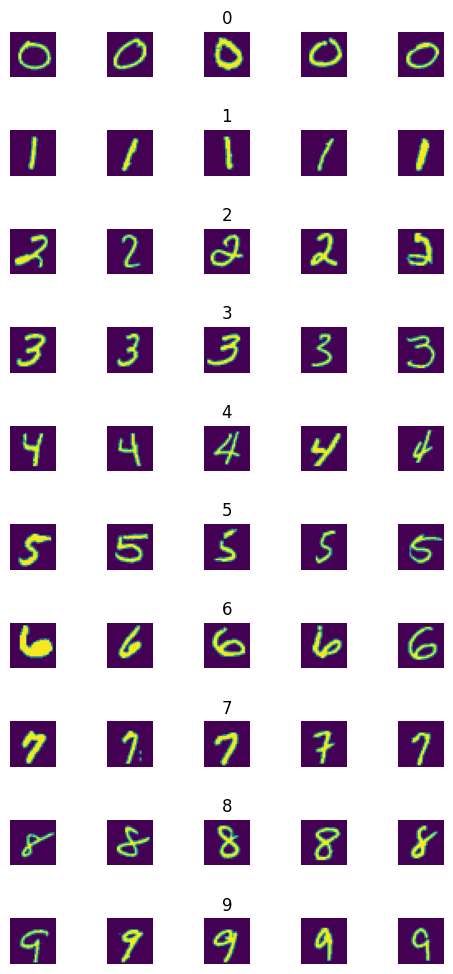

In [70]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):

    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :])
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

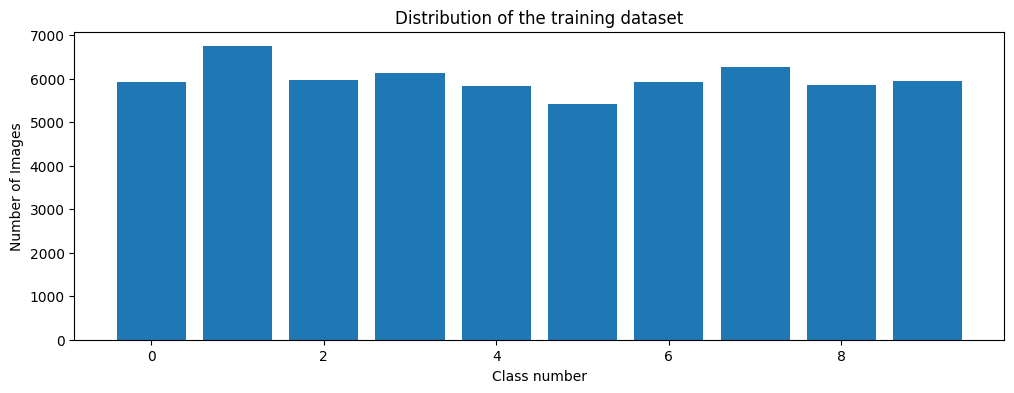

In [71]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")

In [72]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [73]:
X_train = X_train/255
X_test = X_test/255

In [74]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

print(X_test.shape)

(10000, 784)


In [87]:
def create_model():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
  model.add(Dense(num_pixels, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model

In [88]:
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 784)               615440    
                                                                 
 dense_15 (Dense)            (None, 784)               615440    
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [89]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 11s 40ms/step - loss: 0.3387 - accuracy: 0.9134 - val_loss: 0.1316 - val_accuracy: 0.9610
Epoch 2/10
270/270 [==============================] - 11s 39ms/step - loss: 0.1329 - accuracy: 0.9595 - val_loss: 0.1297 - val_accuracy: 0.9658
Epoch 3/10
270/270 [==============================] - 10s 39ms/step - loss: 0.1114 - accuracy: 0.9679 - val_loss: 0.0997 - val_accuracy: 0.9725
Epoch 4/10
270/270 [==============================] - 9s 34ms/step - loss: 0.0952 - accuracy: 0.9717 - val_loss: 0.1096 - val_accuracy: 0.9717
Epoch 5/10
270/270 [==============================] - 10s 37ms/step - loss: 0.0775 - accuracy: 0.9777 - val_loss: 0.1214 - val_accuracy: 0.9725
Epoch 6/10
270/270 [==============================] - 11s 39ms/step - loss: 0.0777 - accuracy: 0.9772 - val_loss: 0.1345 - val_accuracy: 0.9702
Epoch 7/10
270/270 [==============================] - 10s 38ms/step - loss: 0.0728 - accuracy: 0.9787 - val_loss: 0.1315 - val_accuracy: 

Text(0.5, 0, 'epoch')

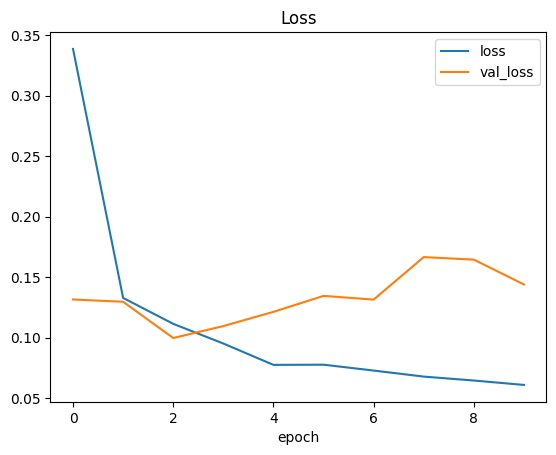

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

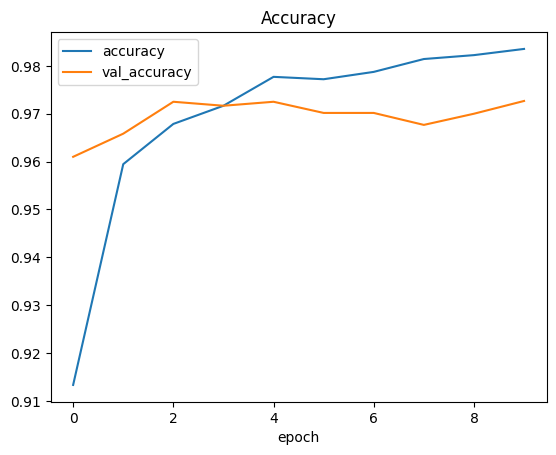

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [93]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.14555273950099945
Test accuracy: 0.9732999801635742


<Response [200]>


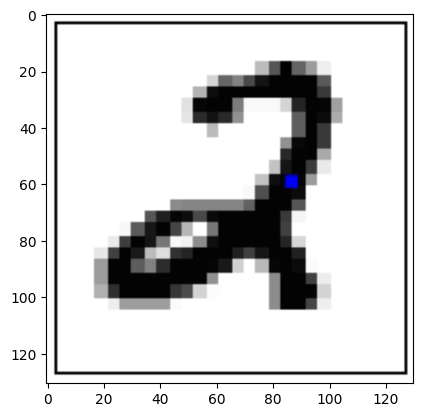

In [94]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   1   1   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255   4
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 189   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255   0   0   0   0   0 249 255
  255 255 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255   0   0   0   0   0   0   0   0
  255 255 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0 253 255 255 255   0   0   0   0  

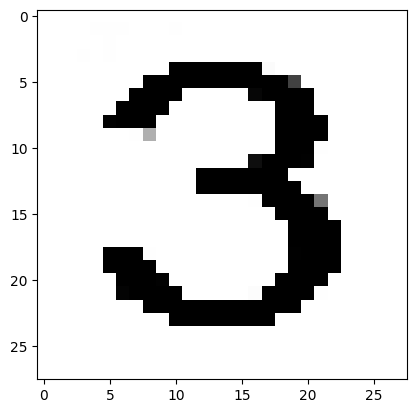

In [101]:
import cv2
img_array = np.asarray(img)
resize = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
print(gray_scale.shape)
plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
print(image)

In [102]:
image = image/255
image = image.reshape(1, 784)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.00392157 0.00392157 0.
  0.         0.         0.00392157 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00392157 0.         0.00392157
  0.         0.         0.         0.         0.         0.
  0.         0.         0.      

In [105]:
import tensorflow as tf
prediction = model.predict(image)
predicted_class = tf.argmax(prediction, axis=-1).numpy()
print("predicted digit:", str(predicted_class))

1/1 [==============================] - 0s 70ms/step
predicted digit: [3]
